<a href="https://colab.research.google.com/github/Sounak123/MachineLearingDemo-Diabetes/blob/main/feedforward_nn_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import tensorflow_hub as hub
from imblearn.over_sampling import RandomOverSampler

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


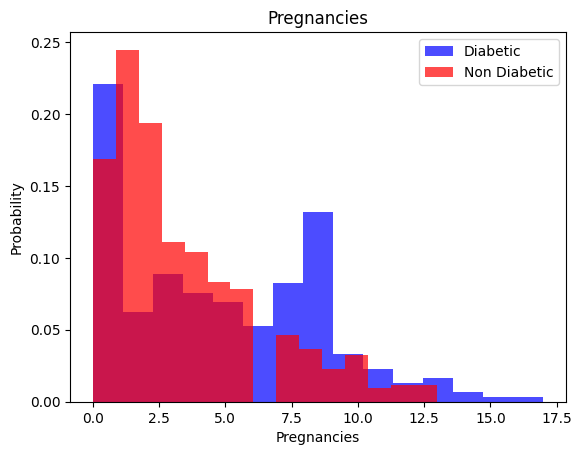

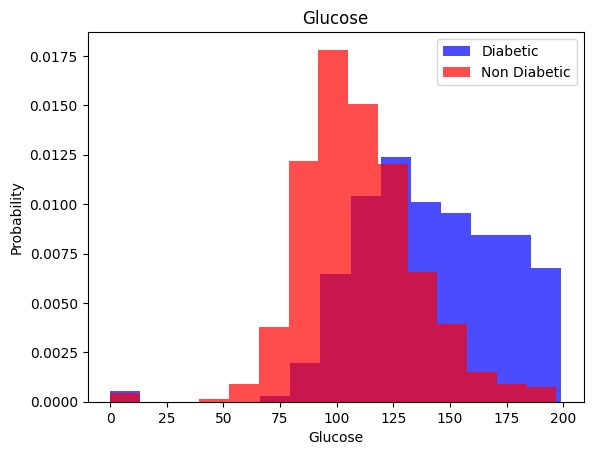

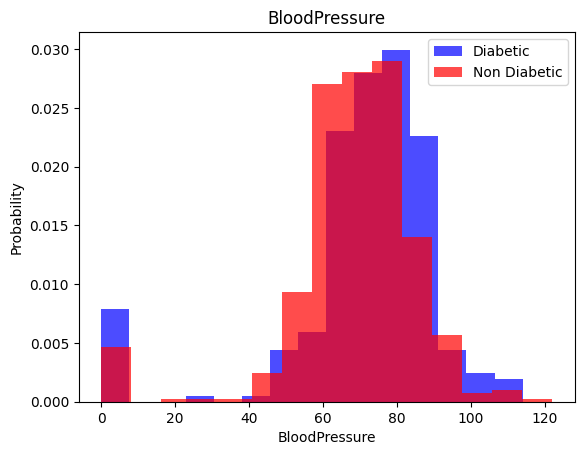

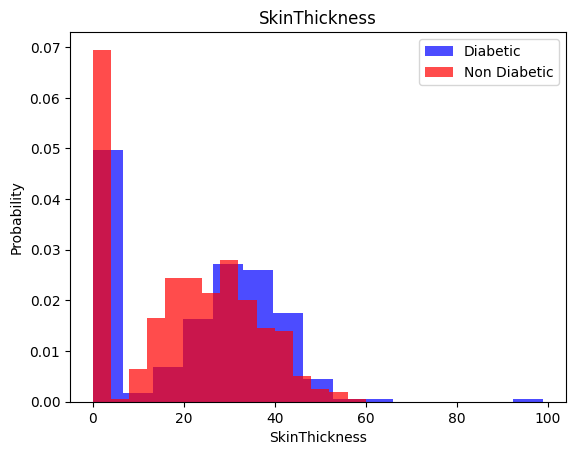

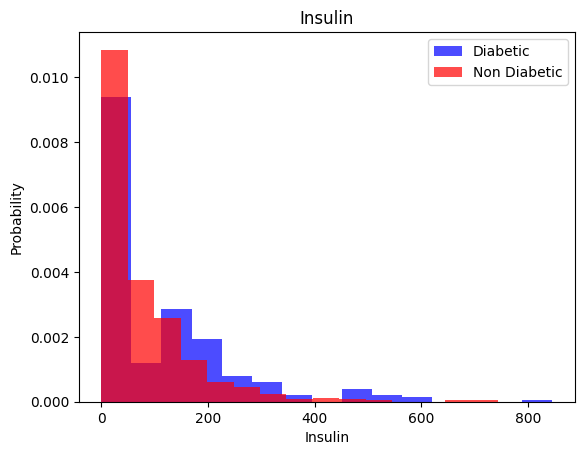

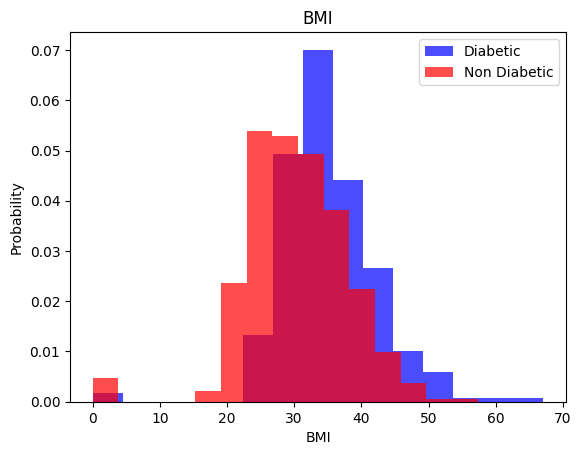

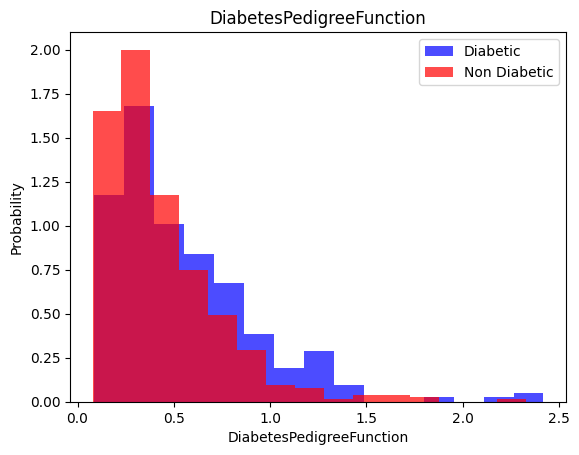

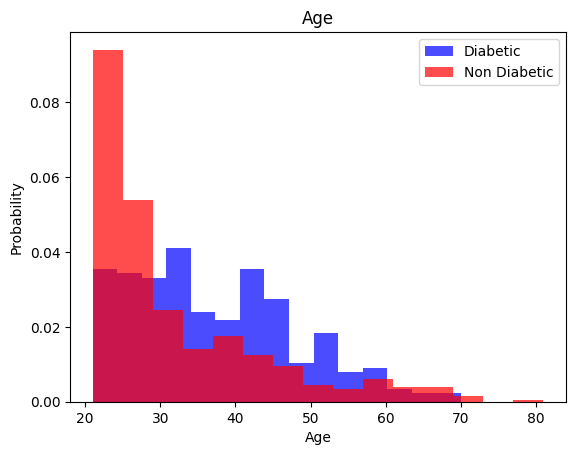

In [8]:
#Iterate over all the columns except last one
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  #Plot the histogram where the Outcome = 1 for each of the label
  #alpha helps us see thru each blocks
  plt.hist(df[df['Outcome']==1][label], color='blue', label='Diabetic', alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color='red', label='Non Diabetic', alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [12]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)


In [44]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)

In [45]:
len(transformed_df[transformed_df['Outcome'] == 1]), len(transformed_df[transformed_df['Outcome'] == 0])

(500, 500)

In [46]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [47]:
#Create a three layer neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),#16 Neurons deep and relu means if x<=0 activation=0 and of x>0 then activation=x
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') #Sigmoid means 0 or 1
])

In [27]:
model

In [48]:
#Add an Optimizer to the model(Its like a bias probability algorithm)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [49]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.4817


[0.6843513250350952, 0.4816666543483734]

In [50]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4850


[0.6938923597335815, 0.48500001430511475]

In [51]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 8ms/step - loss: 0.6687 - accuracy: 0.5200 - val_loss: 0.6585 - val_accuracy: 0.6300
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.6377 - accuracy: 0.6333 - val_loss: 0.6335 - val_accuracy: 0.6850
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 0.6135 - accuracy: 0.6817 - val_loss: 0.6155 - val_accuracy: 0.6650
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5924 - accuracy: 0.7050 - val_loss: 0.5946 - val_accuracy: 0.7250
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5719 - accuracy: 0.7133 - val_loss: 0.5771 - val_accuracy: 0.7450
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5545 - accuracy: 0.7267 - val_loss: 0.5607 - val_accuracy: 0.7600
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5403 - accuracy: 0.7317 - val_loss: 0.5475 - val_accuracy: 0.7600
Epoch 8/20
38/38 [==

In [52]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.7750


[0.503162682056427, 0.7749999761581421]